# alpha = 0.05

In [354]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pylab as plt
%pylab inline
plt.style.use('seaborn-darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [355]:
import scipy.stats as stats

# Use a binomial distribution with n = 1000, p = 0.8.

In [356]:
n = 1000
p = 0.8
np.random.seed(0)
N = 10000 #sample size
list1 = range(N)
z = zeros(N)

for i in range(N):
    list1[i] = np.random.binomial(n, p, N)
    z[i] = (mean(list1[i]) - n*p)*np.sqrt(N)/np.std(list1[i])

# The mean of each sample.

In [357]:
mean1 = [mean(x) for x in list1]

In [358]:
mean1

[799.98149999999998,
 799.97950000000003,
 799.89369999999997,
 800.1925,
 799.95780000000002,
 800.04920000000004,
 800.01020000000005,
 800.16719999999998,
 800.17930000000001,
 799.98109999999997,
 799.86329999999998,
 800.09990000000005,
 799.94560000000001,
 800.07150000000001,
 799.83659999999998,
 799.91189999999995,
 800.0394,
 800.12400000000002,
 799.87530000000004,
 799.98720000000003,
 800.01139999999998,
 799.96040000000005,
 799.92939999999999,
 800.00940000000003,
 799.9502,
 800.01530000000002,
 800.06949999999995,
 800.03750000000002,
 799.96870000000001,
 799.95190000000002,
 799.99630000000002,
 799.96389999999997,
 799.82429999999999,
 799.65989999999999,
 800.08320000000003,
 799.81060000000002,
 800.08969999999999,
 800.00570000000005,
 799.97230000000002,
 799.73040000000003,
 800.13040000000001,
 800.01589999999999,
 800.04700000000003,
 800.13440000000003,
 800.03800000000001,
 800.01589999999999,
 800.23050000000001,
 800.02670000000001,
 799.62570000000005,
 

# Plot the original distribution

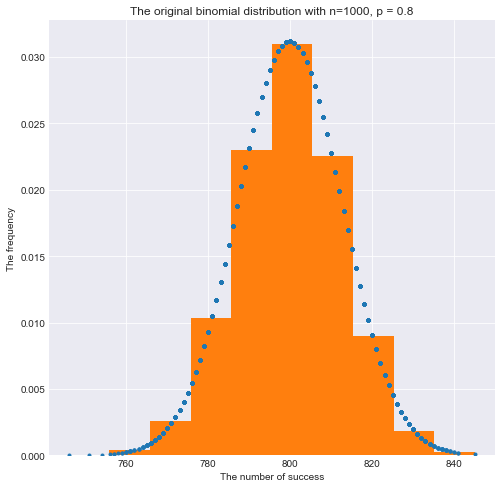

In [359]:
h = sorted(np.random.binomial(n, p, 10000))  

fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.figure(figsize=(8,8))
plt.plot(h,fit,'.')

plt.hist(h,normed=True)  
plt.title('The original binomial distribution with n=1000, p = 0.8')
plt.xlabel('The number of success')
plt.ylabel('The frequency')
plt.show()   

# Plot a sample

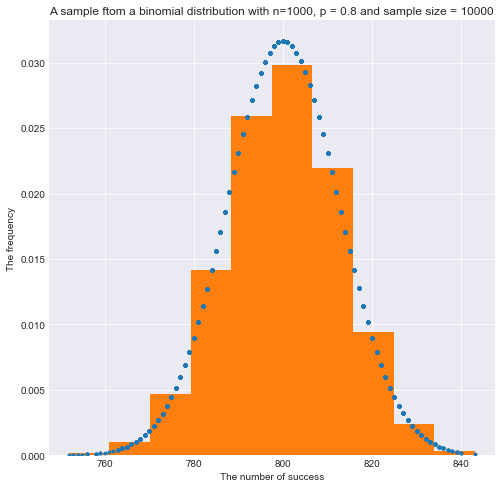

In [360]:
h = sorted(np.random.binomial(n, p, N))  

fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.figure(figsize=(8,8))
pl.plot(h,fit,'.')

pl.hist(h,normed=True)  
plt.title('A sample ftom a binomial distribution with n=1000, p = 0.8 and sample size = {}'.format(N))
plt.xlabel('The number of success')
plt.ylabel('The frequency')
pl.show()   

# Plot the distribution of z statistics

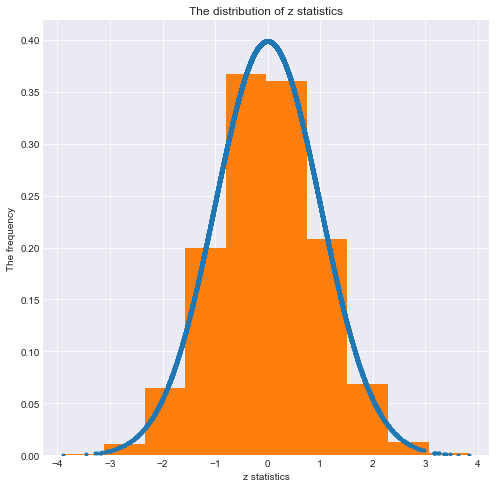

In [361]:
h = sorted(z)  
plt.figure(figsize=(8,8))
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

pl.plot(h,fit,'.')

pl.hist(h,normed=True)  
plt.title('The distribution of z statistics')
plt.xlabel('z statistics')
plt.ylabel('The frequency')
pl.show()   

# Fit the z-statistics with a gaussian model

In [362]:
np.random.seed(0)
gau = np.random.normal(0,1,len(z))

# Assess the goodness of the fitting

In [363]:
ks = stats.ks_2samp(z, gau)
print (ks)

Ks_2sampResult(statistic=0.01529999999999998, pvalue=0.19077157315060139)


The null hypothesis of KS test is that the two samples are drawn from the same distribution. Since the p-value = 0.19 > 0.05, the null hypothesis can not be rejected. The distribution of z statistics is accord with the standard normal distribution.

# Find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

In [364]:
np.random.seed(0)
gau = np.random.normal(0,1,len(z))

In [365]:
cs, p = stats.chisquare(z,gau)
print("The chi-square statistic is {}.".format(cs))

The chi-square statistic is -32162.492486.


In [367]:
import scipy.optimize as opt
def chisqfunc((a, b)):
    np.random.seed(0)
    gau = np.random.normal(a,b,len(z))
    chisq, p = stats.chisquare(z,gau)
    return chisq

x0 = numpy.array([0,1])
result =  opt.minimize(chisqfunc, x0)
print result 


      fun: -32162.492486038955
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -2.28477909e+08,   3.18856719e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 190
      nit: 0
     njev: 45
   status: 2
  success: False
        x: array([ 0.,  1.])
